### 9. Znajdowanie stanu stacjonarnego - "agentowe"

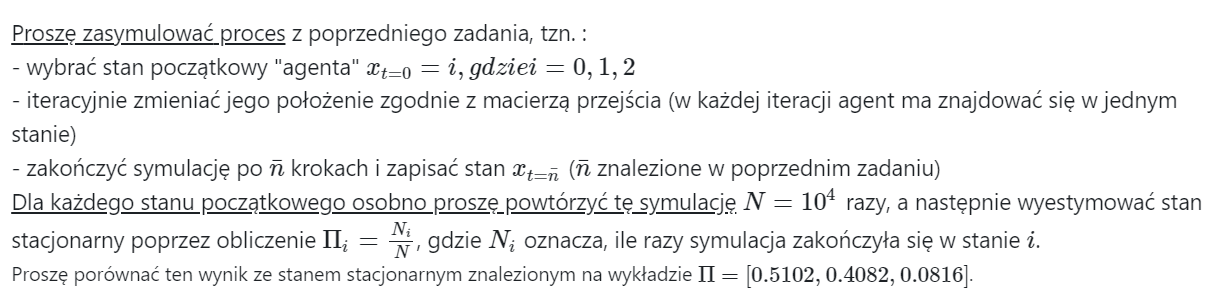

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
P = np.array([
    [0.64, 0.32, 0.04],
    [0.4, 0.5, 0.1],
    [0.25, 0.5, 0.25]
]) # 3x3 matrix

NUM_STATES = 3 # 0, 1, 2
N = 10_000 # 1e4 is a float by default
STEPS = 10 # from ex8.ipynb

ending_states = np.zeros((NUM_STATES, N), dtype=int) # or empty?

for starting_state in range(NUM_STATES):
    print(starting_state)
    for n in range(N):
        state = starting_state
        for step in range(STEPS):
            state = np.random.choice(NUM_STATES, p=P[state]) # transition to a new state
        ending_states[starting_state, n] = state

# stationary_state_estims = [ # index is a starting_state
#     np.unique(np.array(ending_states[starting_state]), return_counts=True)[1]/N # only counts 
#     for starting_state in range(NUM_STATES)
# ]

# the first version wouldn't work if somehow some state didn't appear even once
# that is the ending_states[starting_state] array would only contain, say, states 0 and 1 but not 2
stationary_state_estims = np.array([
    np.bincount(ending_states[starting_state], minlength=NUM_STATES)/N
    for starting_state in range(NUM_STATES)
])

print(stationary_state_estims)

0
1
2
[[0.5073 0.4079 0.0848]
 [0.5198 0.3998 0.0804]
 [0.5046 0.4175 0.0779]]


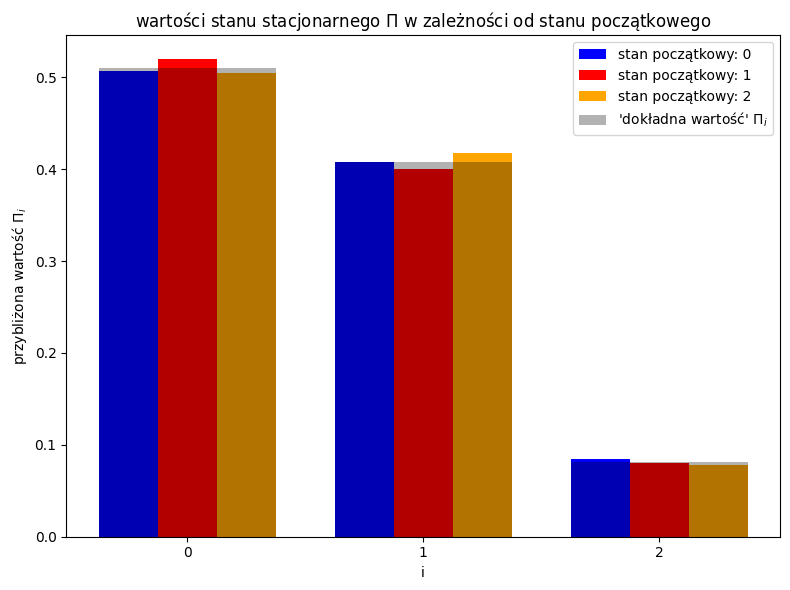

In [7]:
plt.figure(figsize=(8,6))

bar_width = 0.25
colors = ["blue", "red", "orange"]
for i, sse in enumerate(stationary_state_estims):
    plt.bar(np.arange(NUM_STATES) + bar_width*(i-1), sse, width=bar_width, color=colors[i], label=f"stan początkowy: {i}")

plt.xticks(range(NUM_STATES))

# data from ex8.ipynb:
plt.bar(range(NUM_STATES), [0.5102, 0.4082, 0.0816], alpha=0.3, width=3*bar_width,color='black', label=r"""'dokładna wartość' $\Pi_i$""")

plt.title(r"""wartości stanu stacjonarnego $\Pi$ w zależności od stanu początkowego""")
plt.xlabel("i")
plt.ylabel(r'przybliżona wartość $\Pi_i$')
plt.tight_layout()
plt.legend();